In [1]:
!pip install torch_geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 19.0 MB/s eta 0:00:00


In [2]:
import torch
from torch_geometric.data import Data
import networkx as nx
from torch_geometric.utils.convert import to_networkx

In [3]:
" Define a graph "

# a graph with 4 nodes
edge_index = torch.tensor([
                         [0, 0, 0, 1, 2, 2, 3, 3], # Source Nodes
                         [1, 2, 3, 0, 0, 3, 2, 0]  # Target Nodes
                        ], dtype=torch.long)

# 6 Features for each node (4x6 - Number of nodes x NUmber of features)

node_features = torch.tensor([
                            [-8, 1, 5, 8, 2, -3], # Features of Node 0
                            [-1, 0, 2, -3, 0, 1], # Features of Node 1
                            [1, -1, 0, -1, 2, 1], # Features of Node 2
                            [0, 1, 4, -2, 3, 4], # Features of Node 3
                            ],dtype=torch.long)

# 1 Weight for each edge

edge_weight = torch.tensor([
                            [35.], # Weight for nodes (0,1)
                            [48.], # Weight for nodes (0,2)
                            [12.], # Weight for nodes (0,3)
                            [10.], # Weight for nodes (1,0)
                            [70.], # Weight for nodes (2,0)
                            [5.], # Weight for nodes (2,3)
                            [15.], # Weight for nodes (3,2)
                            [8.], # Weight for nodes (3,0)
                            ],dtype=torch.long)

# Make a data object to store graph informaiton
data = Data(x=node_features, edge_index=edge_index, edge_attr=edge_weight)

In [4]:
" Print the graph info "
print("Number of nodes: ", data.num_nodes)
print("Number of edges: ",data.num_edges)
print("Number of features per node (Length of feature vector): ", data.num_node_features)
print("Number of weights per edge (edge-features): ", data.num_edge_features)

Number of nodes:  4
Number of edges:  8
Number of features per node (Length of feature vector):  6
Number of weights per edge (edge-features):  1


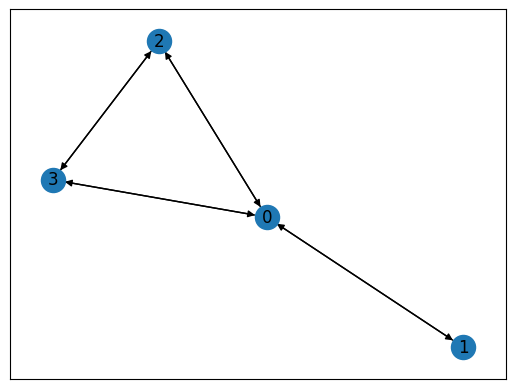

In [5]:
" Plot the graph "

G = to_networkx(data)
nx.draw_networkx(G)

In [6]:
for node in G.nodes:
  print(f'Degree of node {node} is {G.degree(node)}')

Degree of node 0 is 6
Degree of node 1 is 2
Degree of node 2 is 4
Degree of node 3 is 4
